# Basic Exploratory Data Analysis
## Prerequisites
- Install Python 3



In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load Feature File
df = pd.read_csv("../TeamSeasons.csv")

## Basic Seed Exploration

In [16]:
tourney_teams = df[df['Seed'].notna()]

In [47]:
round_num_map = {
    "Play In": 0,
    "First Round": 1,
    "Second Round": 2,
    "Sweet Sixteen": 3,
    "Elite Eight": 4,
    "Final Four": 5,
    "Championship": 6,
    "Champion": 7
}
tourney_teams["ExitRoundNum"] = tourney_teams["ExitRound"].map(round_num_map)


/var/folders/7y/1jp5fzbs05q03xszr7zmwvqw0000gn/T/ipykernel_18533/2435551509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_teams["ExitRoundNum"] = tourney_teams["ExitRound"].map(round_num_map)


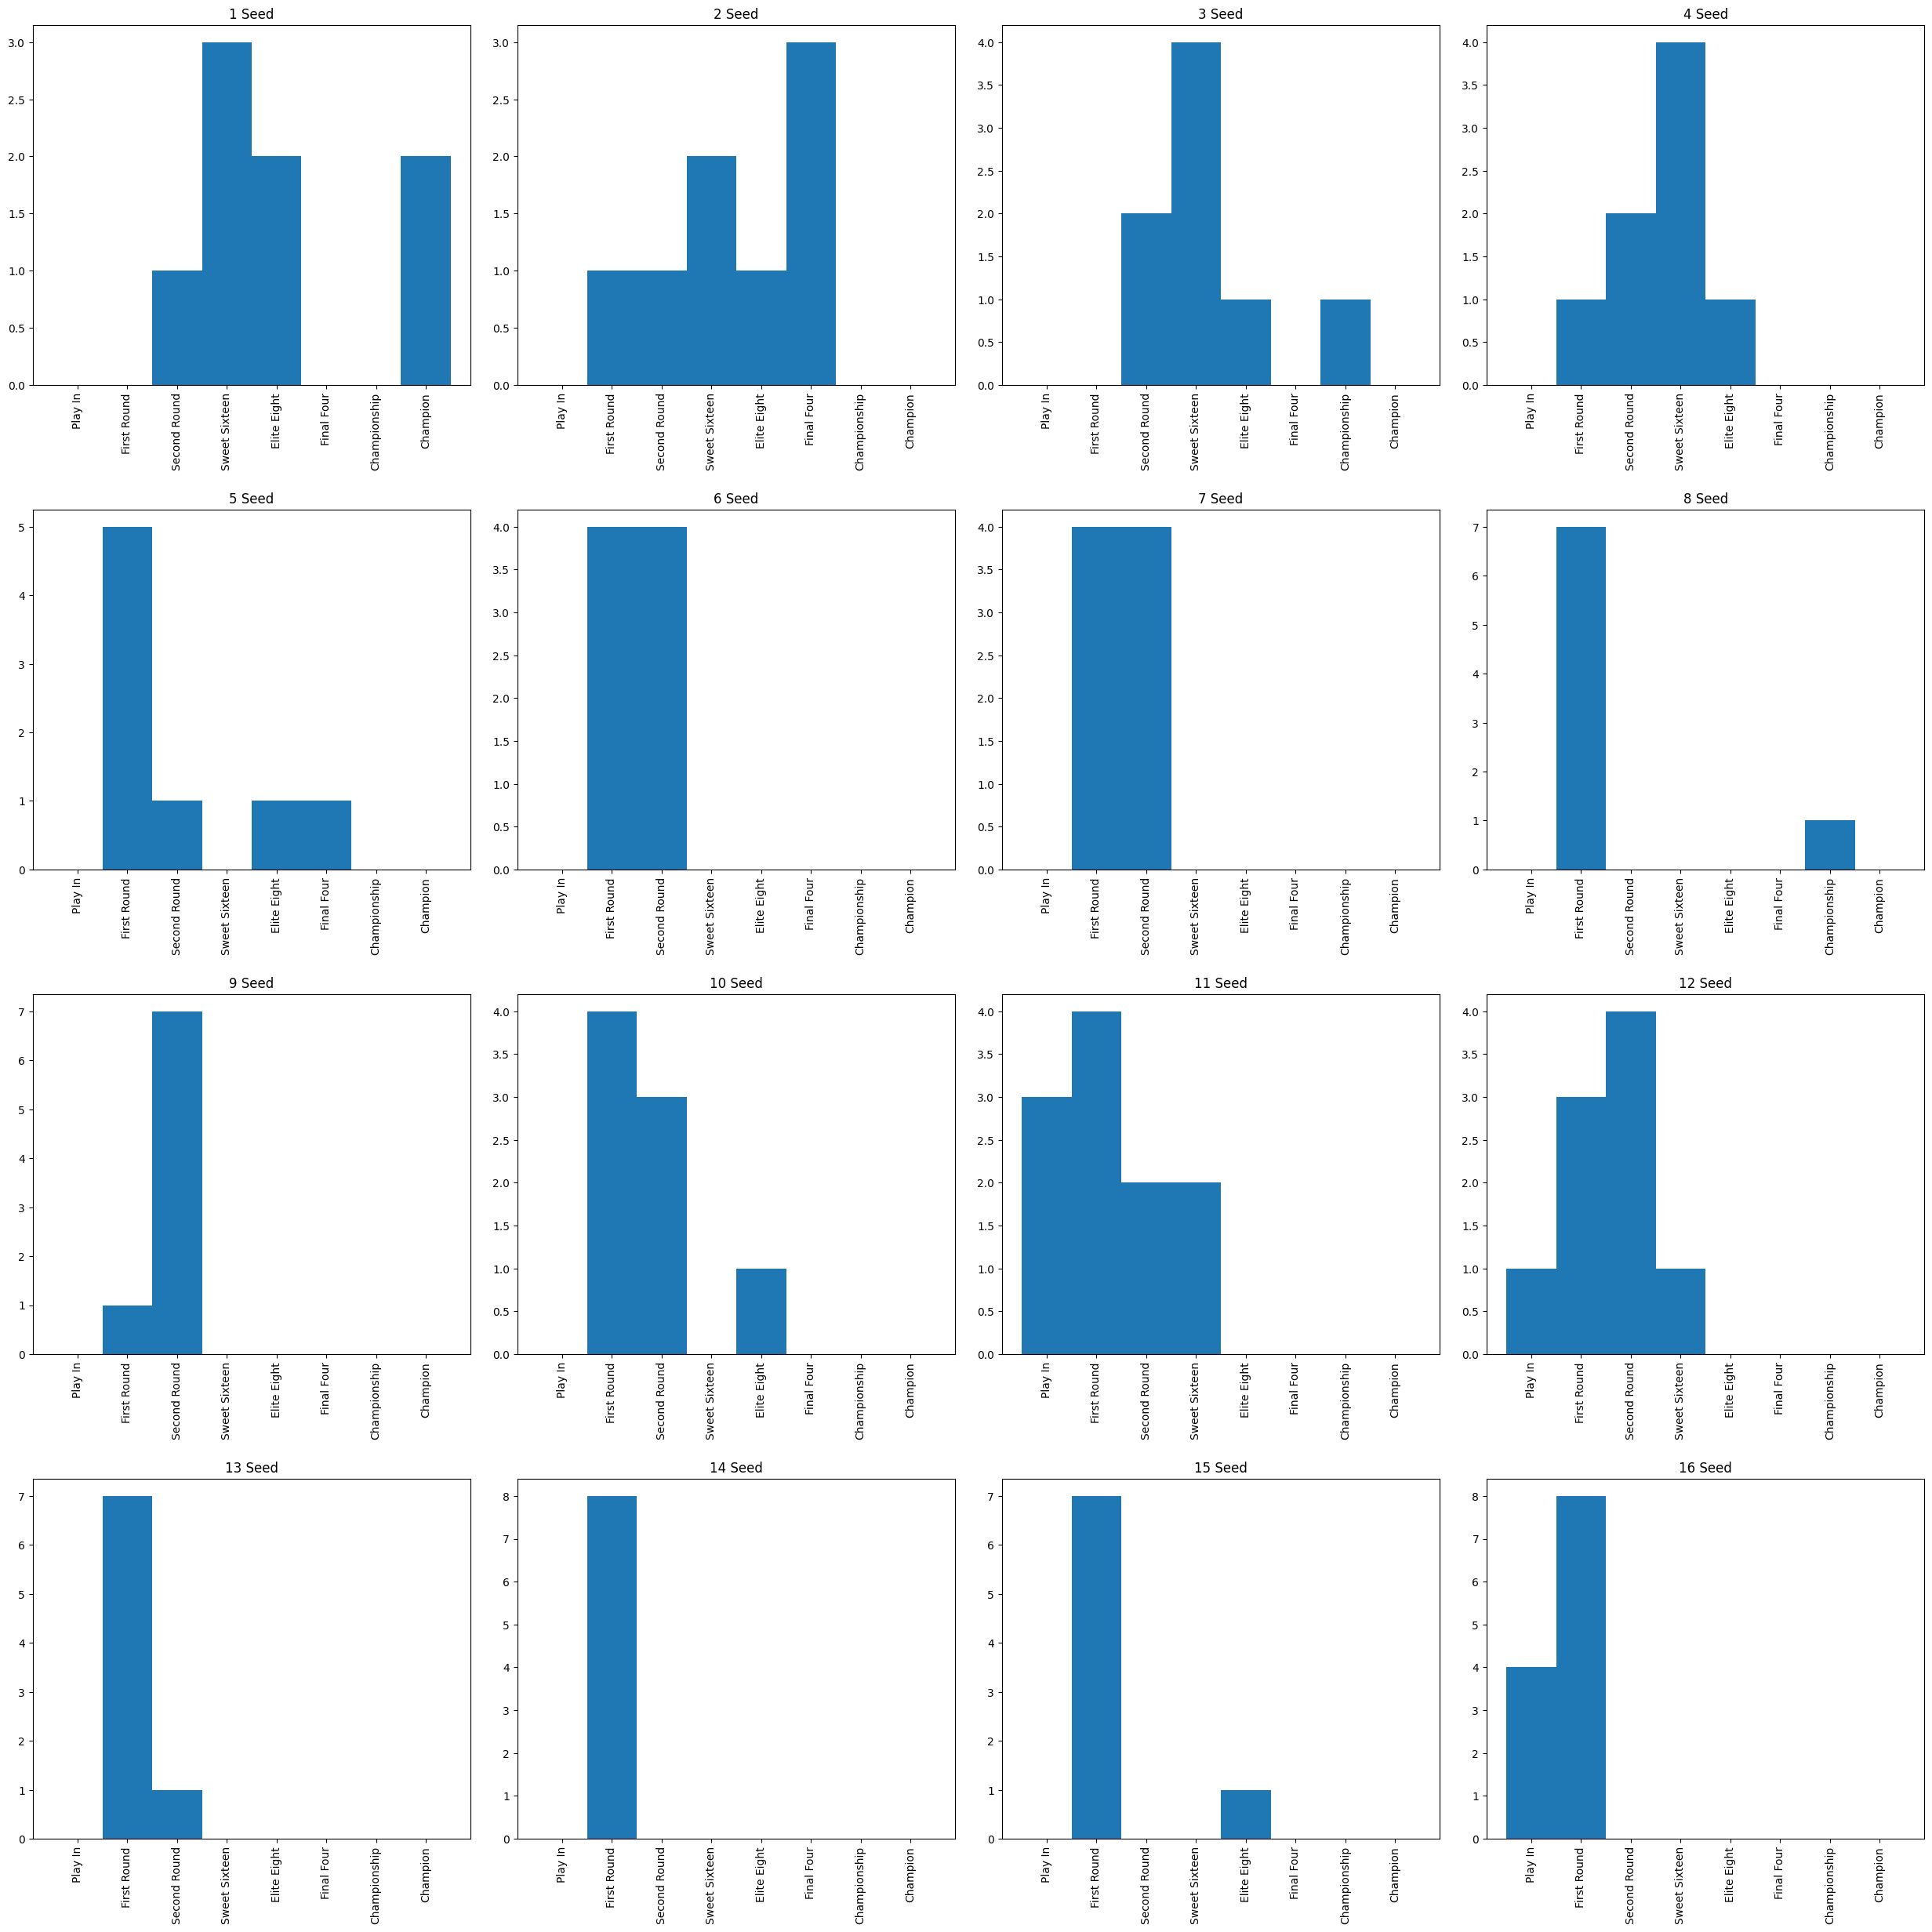

In [81]:
fig, ax = plt.subplots(4, 4, figsize=(25, 25))
ax = ax.flatten()
for seed, seed_df in tourney_teams[["ExitRound", "Seed", "ExitRoundNum"]].groupby("Seed"):
    seed_axis = ax[int(seed) - 1]
    seed_df = seed_df.sort_values(["ExitRoundNum"])
    n, bins, patches = seed_axis.hist(seed_df["ExitRoundNum"], bins=range(0, 9))
    seed_axis.set_title(f"{int(seed)} Seed")
    seed_axis.set_xticks(ticks = [p._x0 + (p._width/2) for p in patches], labels = round_num_map.keys(), rotation=90)

fig.tight_layout(pad = 2)
plt.show()